In [11]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
from mlxtend.frequent_patterns import apriori,association_rules

### Importing Datasets

In [13]:
marketing_data = pd.read_csv("50_SupermarketBranches.csv")
customer_data = pd.read_csv("Supermarket_CustomerMembers.csv")
df_products = pd.read_csv("Market_Basket_Optimisation.csv",header=None)

In [14]:
marketing_data.head()

,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df_products.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [18]:
State = marketing_data.State.unique()
State

x0 = marketing_data['Profit']
x1 = marketing_data['Advertisement Spend']

fig = go.Figure(data=[
    go.Bar(name='Profit', x=State, y=x0),
    go.Bar(name='Advertisement', x=State, y=x1)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(
    title='Profit and Advertisement in every state')
fig.show()

In [19]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
fig2 = go.Figure()
fig2.add_trace(go.Histogram(histfunc="sum", x=customer_data['Genre']))
fig2.update_layout(
    title='Gender ratio')

In [21]:
fig = px.scatter_matrix(customer_data,dimensions=["Age","Spending Score (1-100)","Annual Income (k$)"], color = "Genre")
fig.update_layout(
    title='Supermaket customers Dataset',
    dragmode='select',
    width=1000,
    height=600,
    hovermode='closest',
)
fig.show()

### Inferences:
- Customers with an annual income of $40k - $65k consistently exhibit a steady spending tendency, maintaining a spending score between 40 and 60.
- Younger individuals typically have higher spending scores than older ones, suggesting an age-related influence on consumer spending patterns.
- People between 30 and 45 usually earn more money, showing it's a time when many tend to make higher incomes.

In [22]:
products = df_products.values.tolist()
name_col =['ID_client','item_description']
df_prod = pd.DataFrame(columns=name_col)
for i in range(len(products)):
    buy_list = set(products[i])
    for j in buy_list:
        n = len(df_prod.index)
        df_prod.loc[n,'ID_client'] = i
        df_prod.loc[n,'item_description'] = j

df_prod.dropna(inplace = True)

In [23]:
df_prod

,ID_client,item_description
0,0,almonds
1,0,green tea
2,0,frozen smoothie
3,0,yams
4,0,salad
...,...,...
36851,7499,green tea
36853,7500,eggs
36854,7500,frozen smoothie
36855,7500,yogurt cake


Below, I am creating a DataFrame to represent a transaction dataset where each row corresponds to a transaction, each column corresponds to a unique product, and the entries represent the count of each product in the respective transactions. The last column 'Count_products' indicates the total number of products in each transaction. The descriptive statistics are then displayed for this DataFrame

In [24]:
list_products = set()
for i in range(len(products)):
    list_products = set(products[i]) | list_products
    
list_products = list(list_products)
# list_products.pop(0)
list_products.append('Count_products')
aa =np.zeros((len(products),len(list_products)))
df_prod2 = pd.DataFrame(aa, columns = list_products)

for i in range(len(products)-1):
    buy_list = set(products[i])
    for j in range(len(list_products)-1):
        for k in buy_list:
            if list_products[j] == k:
                df_prod2.iloc[i,j] = 1 + df_prod2.iloc[i,j]

    df_prod2.iloc[i,len(list_products)-1] = df_prod2.iloc[i,0:len(list_products)-2].sum()
    
pd.set_option('display.max_columns', None)
df_prod2.describe()

,chocolate,milk,tomatoes,oatmeal,cereals,turkey,rice,shallot,chicken,cake,green tea,extra dark chocolate,shampoo,gums,cream,napkins,cooking oil,frozen vegetables,burgers,eggs,white wine,frozen smoothie,chutney,soup,energy bar,yams,pickles,salad,flax seed,gluten free bar,mayonnaise,mineral water,fromage blanc,candy bars,butter,fresh tuna,low fat yogurt,oil,toothpaste,hot dogs,dessert wine,barbecue sauce,burger sauce,cottage cheese,vegetables mix,pepper,bacon,french fries,magazines,meatballs,nonfat milk,antioxydant juice,cider,cookies,strawberries,babies food,zucchini,melons,red wine,escalope,water spray,salmon,fresh bread,french wine,sandwich,whole weat flour,brownies,ground beef,pancakes,eggplant,hand protein bar,almonds,mint,herb & pepper,tomato sauce,bug spray,asparagus,ketchup,spaghetti,soda,asparagus,tea,muffins,pasta,green beans,grated cheese,green grapes,light cream,corn,body spray,spinach,pet food,carrots,tomato juice,protein bar,honey,bramble,whole wheat rice,parmesan cheese,olive oil,mint green tea,NaN,champagne,ham,avocado,strong cheese,whole wheat pasta,energy drink,mashed potato,clothes accessories,shrimp,yogurt cake,black tea,cauliflower,salt,sparkling water,light mayo,blueberries,mushroom cream sauce,chili,chocolate bread,Count_products
count,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.00000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.0,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000
mean,0.163845,0.129583,0.068391,0.004399,0.025730,0.062525,0.018797,0.007732,0.059992,0.081056,0.132116,0.011998,0.004933,0.013465,0.000933,0.000667,0.051060,0.095321,0.087188,0.179576,0.016531,0.063192,0.004133,0.050527,0.027063,0.011465,0.005999,0.004933,0.009065,0.006932,0.006133,0.238368,0.013598,0.009732,0.030129,0.022264,0.076390,0.023064,0.008132,0.032396,0.004399,0.010799,0.005866,0.031862,0.025730,0.026530,0.008666,0.170911,0.010932,0.020931,0.010399,0.008932,0.010532,0.080389,0.021330,0.004533,0.009465,0.011998,0.028130,0.079323,0.000400,0.042528,0.043061,0.02253,0.004533,0.009332,0.033729,0.098254,0.095054,0.013198,0.005199,0.020397,0.017464,0.049460,0.014131,0.008666,0.000133,0.004399,0.174110,0.006266,0.004666,0.003866,0.024130,0.015731,0.008666,0.052393,0.009065,0.015598,0.004799,0.011465,0.007066,0.006532,0.015331,0.030396,0.018531,0.047460,0.001866,0.058526,0.019864,0.065858,0.005599,0.0,0.046794,0.026530,0.033329,0.007732,0.029463,0.026663,0.004133,0.008399,0.071457,0.027196,0.014265,0.004799,0.009199,0.006266,0.027196,0.009199,0.019064,0.006133,0.004266,3.909079
std,0.370159,0.335866,0.252432,0.066186,0.158339,0.242123,0.135818,0.087599,0.237488,0.272939,0.338639,0.108885,0.070064,0.115262,0.030536,0.025811,0.220135,0.293677,0.

In [25]:
df_prod2

,chocolate,milk,tomatoes,oatmeal,cereals,turkey,rice,shallot,chicken,cake,green tea,extra dark chocolate,shampoo,gums,cream,napkins,cooking oil,frozen vegetables,burgers,eggs,white wine,frozen smoothie,chutney,soup,energy bar,yams,pickles,salad,flax seed,gluten free bar,mayonnaise,mineral water,fromage blanc,candy bars,butter,fresh tuna,low fat yogurt,oil,toothpaste,hot dogs,dessert wine,barbecue sauce,burger sauce,cottage cheese,vegetables mix,pepper,bacon,french fries,magazines,meatballs,nonfat milk,antioxydant juice,cider,cookies,strawberries,babies food,zucchini,melons,red wine,escalope,water spray,salmon,fresh bread,french wine,sandwich,whole weat flour,brownies,ground beef,pancakes,eggplant,hand protein bar,almonds,mint,herb & pepper,tomato sauce,bug spray,asparagus,ketchup,spaghetti,soda,asparagus,tea,muffins,pasta,green beans,grated cheese,green grapes,light cream,corn,body spray,spinach,pet food,carrots,tomato juice,protein bar,honey,bramble,whole wheat rice,parmesan cheese,olive oil,mint green tea,NaN,champagne,ham,avocado,strong cheese,whole wheat pasta,energy drink,mashed potato,clothes accessories,shrimp,yogurt cake,black tea,cauliflower,salt,sparkling water,light mayo,blueberries,mushroom cream sauce,chili,chocolate bread,Count_products
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [26]:
fig6 = px.histogram(df_prod, x="item_description", color="item_description").update_xaxes(categoryorder='total descending')
fig6.update_layout(
    title='Items purchased in the supermarket',
    dragmode='select',
    width=2000,
    height=600,
    hovermode='closest',
)
fig6.show()

To understand association rules, it is necessary to understand four fundamental concepts:

- Support: Support is an indication of how frequently the itemset appears in the dataset. In other words, this is an indication of how popular an itemset is in a dataset.

- Confidence: Confidence is an indication of how often the rule has been found to be true. In other words, confidence says how likely item Y is purchased when item X is purchased.

- Lift: Lift is a metric to measure the ratio of X and Y occur together to X and Y occurrence if they were statistically independent. In other words, lift illustrates how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.

A Lift score that is close to 1 indicates that the antecedent and the consequent are independent and occurrence of antecedent has no impact on occurrence of consequent.

A Lift score that is bigger than 1 indicates that the antecedent and consequent are dependent to each other, and the occurrence of antecedent has a positive impact on occurrence of consequent.

A Lift score that is smaller than 1 indicates that the antecedent and the consequent are substitute each other that means the existence of antecedent has a negative impact to consequent or visa versa.

Conviction: Conviction measures the implication strength of the rule from statistical independence Conviction score is a ratio between the probability that X occurs without Y while they were dependent and the actual probability of X existence without Y.

In [ ]:
df_prod2.drop(columns = ['Count_products'],inplace = True)

In [103]:
freq_item = apriori(df_prod2, min_support=0.01, use_colnames=True)
freq_item['length'] = freq_item['itemsets'].apply(lambda x: len(x))
freq_item

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets,length
0,0.020397,(almonds),1
1,0.129583,(milk),1
2,0.022530,(french wine),1
3,0.016531,(white wine),1
4,0.052393,(grated cheese),1
...,...,...,...
252,0.014265,"(spaghetti, eggs, mineral water)",3
253,0.010265,"(spaghetti, olive oil, mineral water)",3
254,0.015865,"(spaghetti, mineral water, chocolate)",3
255,0.010532,"(spaghetti, eggs, chocolate)",3


In [104]:
freq_item[ (freq_item['length'] == 2) & (freq_item['support'] >= 0.04) ]

,support,itemsets,length
85,0.047994,"(milk, mineral water)",2
106,0.040928,"(ground beef, mineral water)",2
142,0.059725,"(spaghetti, mineral water)",2
203,0.050927,"(eggs, mineral water)",2
215,0.052660,"(mineral water, chocolate)",2


In [106]:
freq_item[ (freq_item['length'] == 3)]

,support,itemsets,length
240,0.011065,"(milk, ground beef, mineral water)",3
241,0.015731,"(spaghetti, milk, mineral water)",3
242,0.010932,"(spaghetti, milk, chocolate)",3
243,0.011065,"(milk, frozen vegetables, mineral water)",3
244,0.013065,"(eggs, milk, mineral water)",3
245,0.013998,"(milk, mineral water, chocolate)",3
246,0.017064,"(spaghetti, ground beef, mineral water)",3
247,0.010132,"(eggs, ground beef, mineral water)",3
248,0.010932,"(ground beef, mineral water, chocolate)",3
249,0.011465,"(spaghetti, mineral water, pancakes)",3


In [117]:
rules = association_rules(freq_item, metric="lift", min_threshold=1.3)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence",ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
248,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342,2,1
206,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969,2,1
255,"(ground beef, chocolate)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837,2,1
224,"(milk, frozen vegetables)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,0.503555,2,1
180,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221,1,1
261,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452,2,1
282,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954,0.478514,2,1
212,"(spaghetti, milk)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,0.007278,1.368879,0.479672,2,1
237,"(milk, chocolate)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656,0.467922,2,1
242,"(spaghetti, ground beef)",(mineral water),0.039195,0.238368,0.017064,0.435374,1.826477,0.007722,1.348914,0.470957,2,1


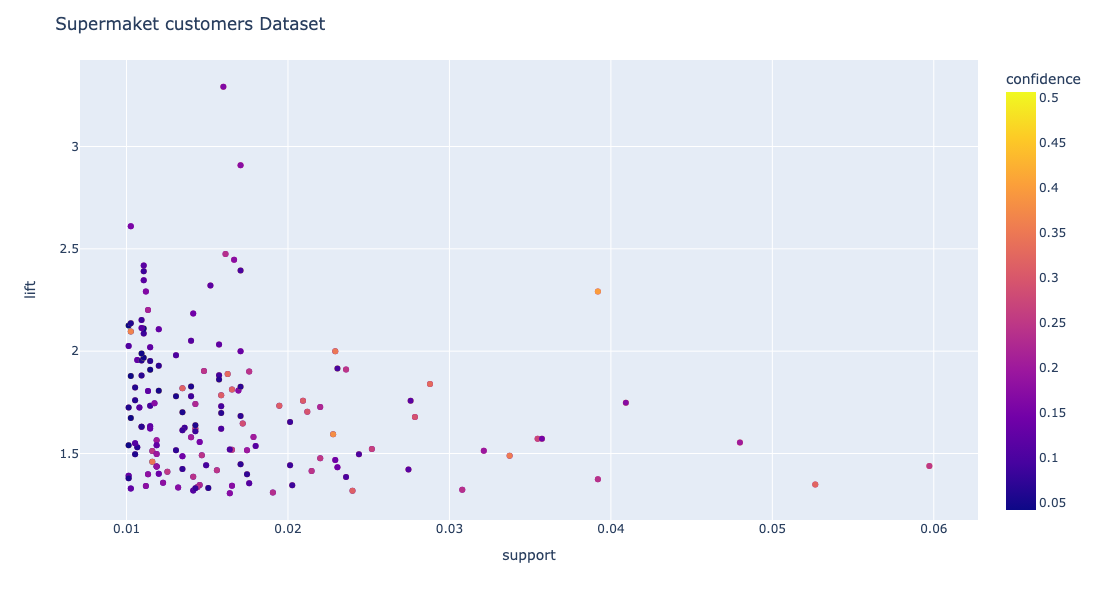

In [121]:
fig7 = px.scatter(rules, x ='support', y =  'lift', color = 'confidence')
fig7.update_layout(
    title='Supermaket customers Dataset',
    dragmode='select',
    width=1000,
    height=600,
    hovermode='closest',
)
fig7.show()

In [122]:
rules[ (rules['antecedents_length'] == 1) ].sort_values("confidence",ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
180,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221,1,1
176,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536,1,1
50,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369,1,1
64,(salmon),(mineral water),0.042528,0.238368,0.017064,0.401254,1.683336,0.006927,1.272045,0.423972,1,1
160,(cereals),(mineral water),0.025730,0.238368,0.010265,0.398964,1.673729,0.004132,1.267198,0.413162,1,1
45,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943,1,1
174,(cooking oil),(mineral water),0.051060,0.238368,0.020131,0.394256,1.653978,0.007960,1.257349,0.416672,1,1
164,(red wine),(mineral water),0.028130,0.238368,0.010932,0.388626,1.630358,0.004227,1.245770,0.397829,1,1
173,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438,0.396502,1,1
142,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270,0.402413,1,1


In [126]:
## Ascending = True

In [123]:
rules[ (rules['antecedents_length'] == 1) & (rules['consequents_length'] == 1) ].sort_values("confidence",ascending=True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
161,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,0.528512,1,1
165,(mineral water),(red wine),0.238368,0.028130,0.010932,0.045861,1.630358,0.004227,1.018584,0.507644,1,1
84,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630,1,1
94,(spaghetti),(red wine),0.174110,0.028130,0.010265,0.058959,2.095966,0.005368,1.032761,0.633127,1,1
169,(mineral water),(honey),0.238368,0.047460,0.015065,0.063199,1.331619,0.003752,1.016801,0.326975,1,1
67,(chocolate),(salmon),0.163845,0.042528,0.010665,0.065094,1.530617,0.003697,1.024137,0.414599,1,1
100,(spaghetti),(honey),0.174110,0.047460,0.011865,0.068147,1.435873,0.003602,1.022200,0.367554,1,1
188,(eggs),(herb & pepper),0.179576,0.049460,0.012532,0.069785,1.410930,0.003650,1.021849,0.354997,1,1
184,(chocolate),(champagne),0.163845,0.046794,0.011598,0.070789,1.512793,0.003932,1.025824,0.405392,1,1
179,(mineral water),(herb & pepper),0.238368,0.049460,0.017064,0.071588,1.447397,0.005275,1.023835,0.405845,1,1


 When a person buys 'mineral water' he has a low chance of buying items like 'cereals', 'red wine' and 'avocado'